In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회
+ 분류 문제

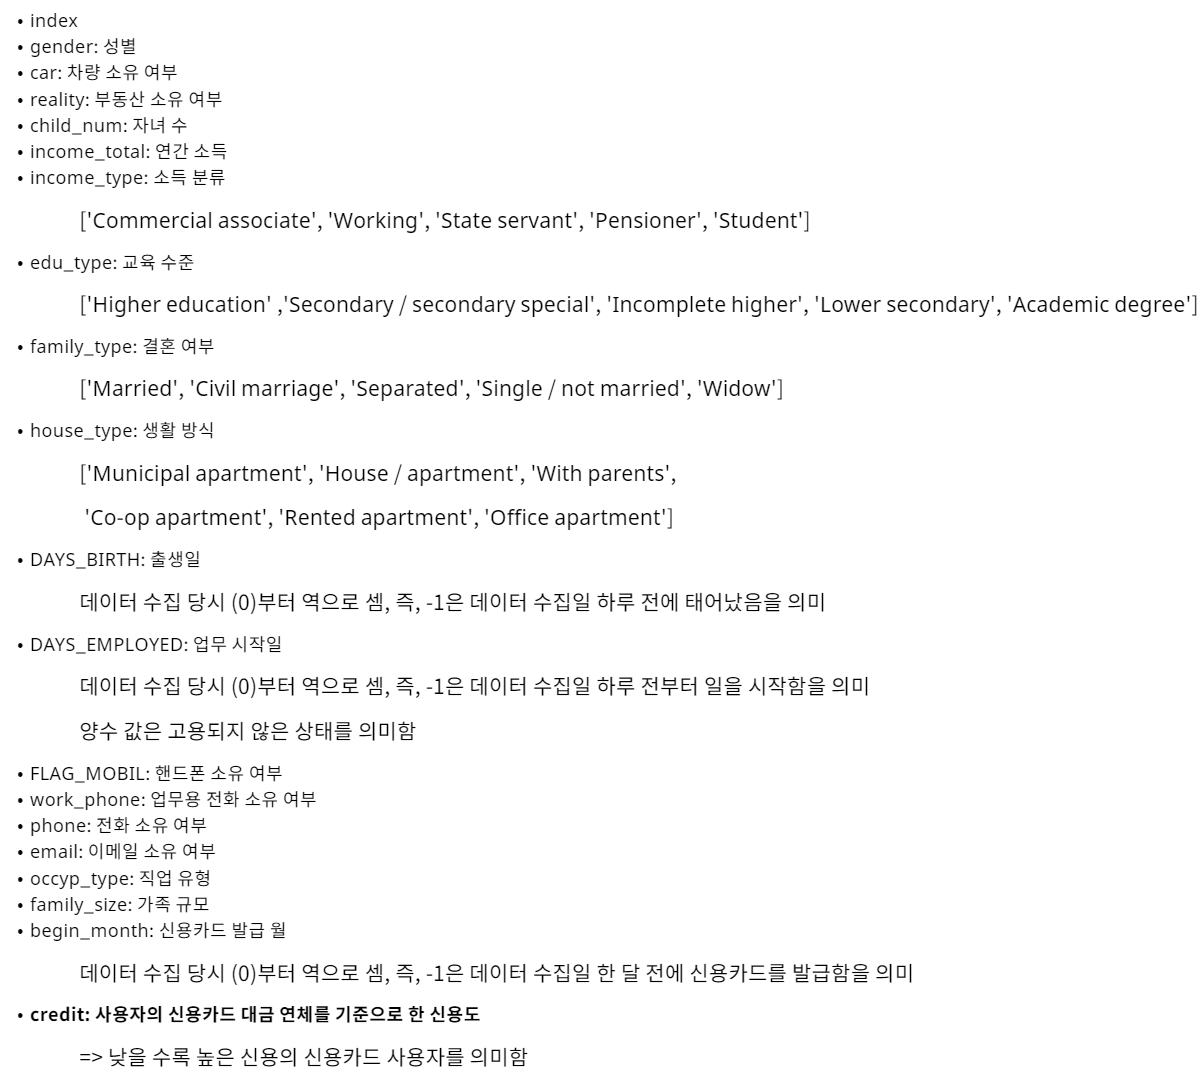

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/신용카드/train.csv')
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
sb = pd.read_csv('/content/drive/MyDrive/신용카드/sample_submission.csv')
sb.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


### 데이터 기본 정보

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

+ 직업 유형에 결측값 존재

In [ ]:
train.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

In [ ]:
train['child_num'] = train['child_num'].astype('object')
train['FLAG_MOBIL'] = train['FLAG_MOBIL'].astype('object')
train['work_phone'] = train['work_phone'].astype('object')
train['phone'] = train['phone'].astype('object')
train['email'] = train['email'].astype('object')
train['family_size '] = train['family_size'].astype('object')
#train['credit'] = train['credit'].astype('object')

In [ ]:
train = train.drop('index',axis=1)

In [ ]:
train.dtypes

gender            object
car               object
reality           object
child_num         object
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL        object
work_phone        object
phone             object
email             object
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
family_size       object
dtype: object

### EDA

In [ ]:
def str_EDA(data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes == 'O':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.barplot(x=i,y='credit',data=group_data,palette=colors)
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)

      plt.subplot(1,2,2)
      plt.pie(group_data['credit']/100, labels=group_data[i], autopct='%.1f%%',colors=colors, startangle=90,counterclock=False)
      plt.title('%s pieplot'%i)
      plt.show()

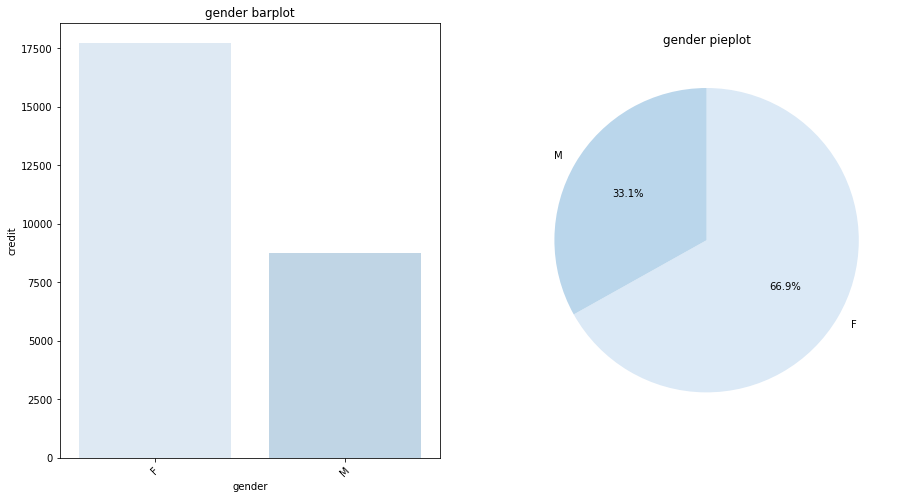

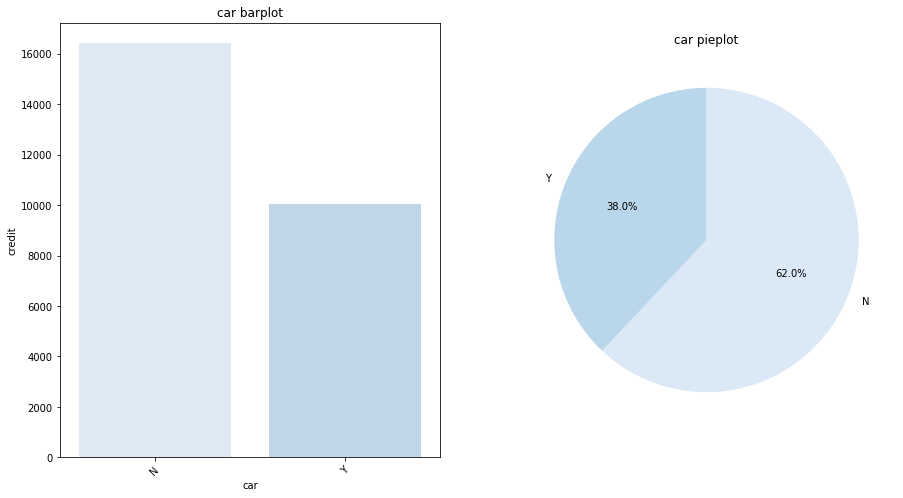

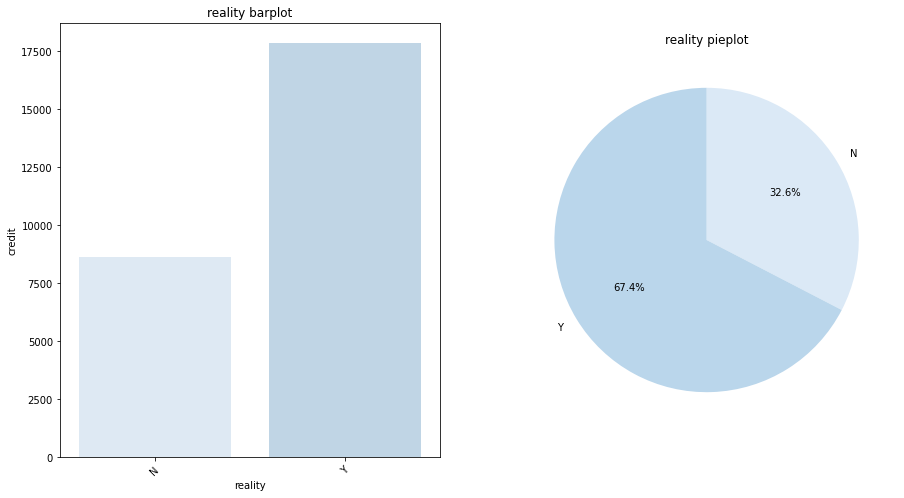

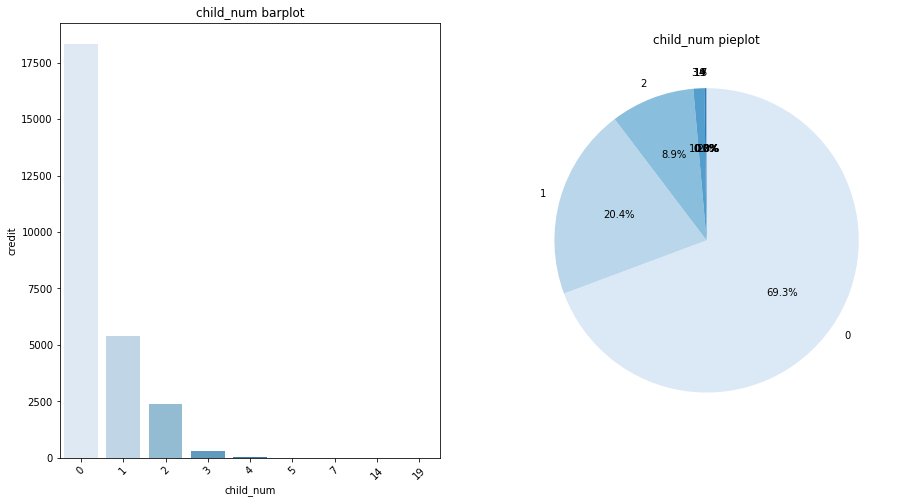

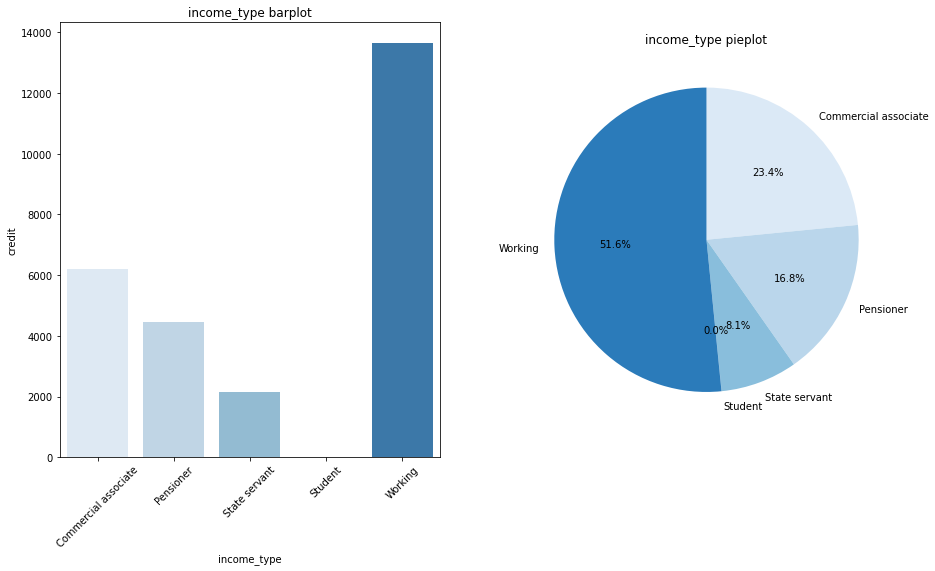

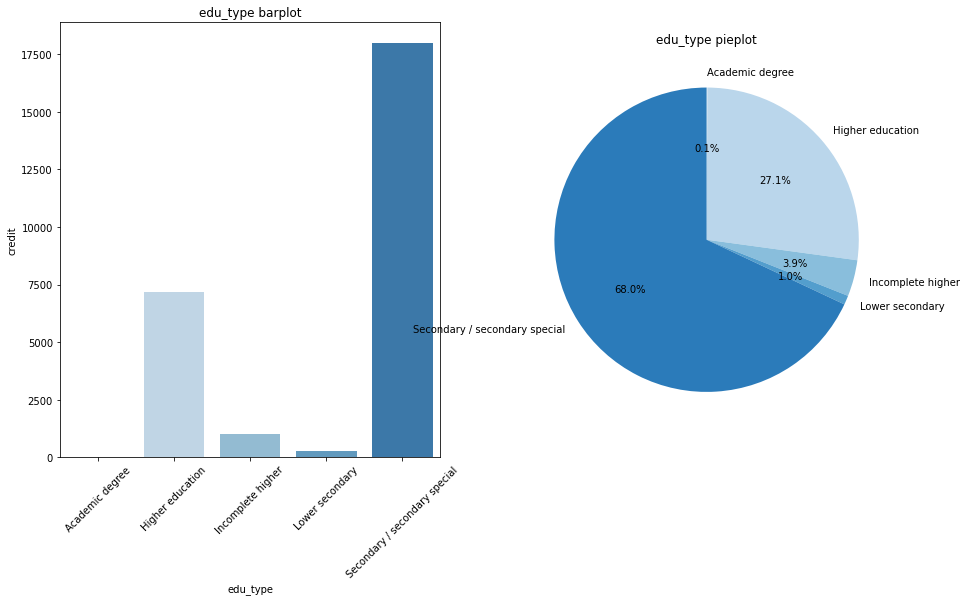

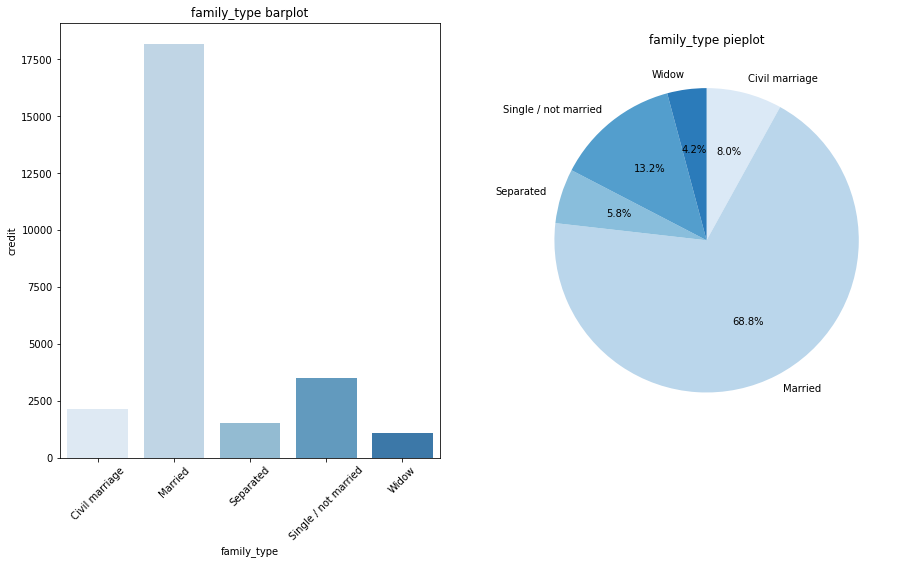

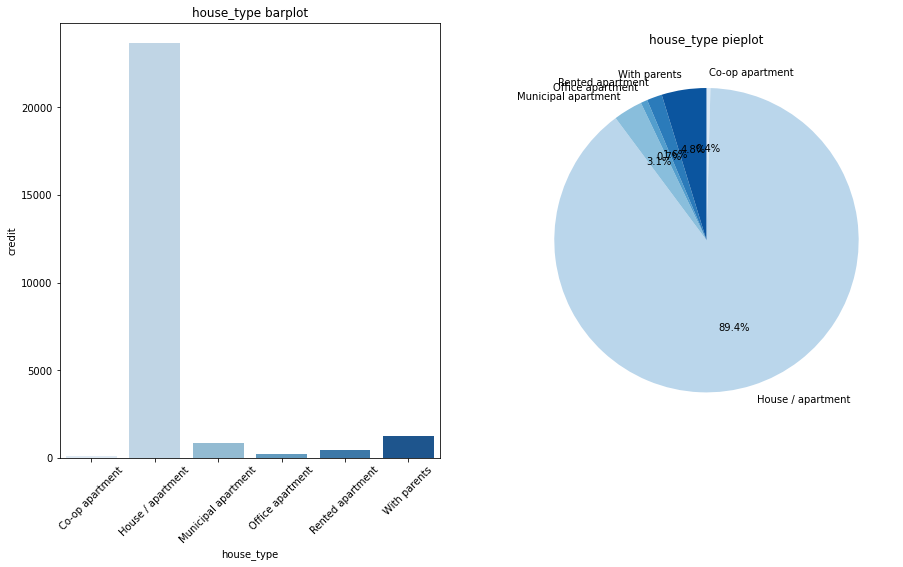

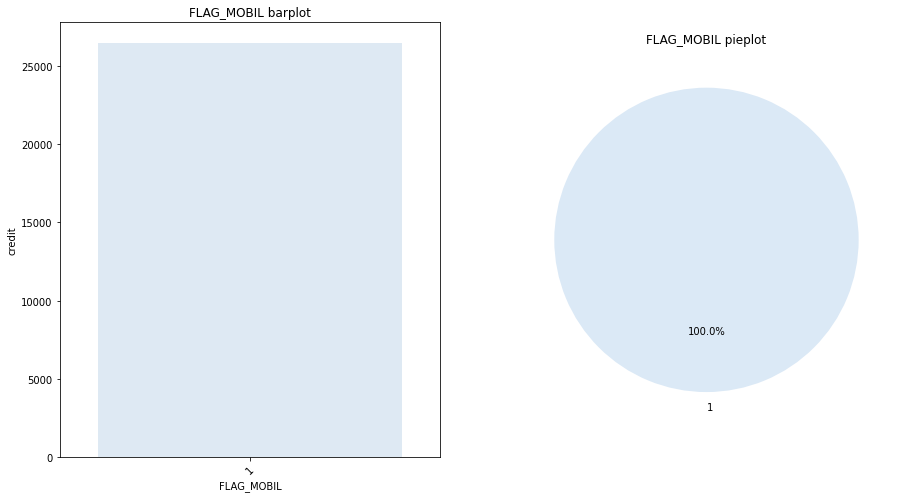

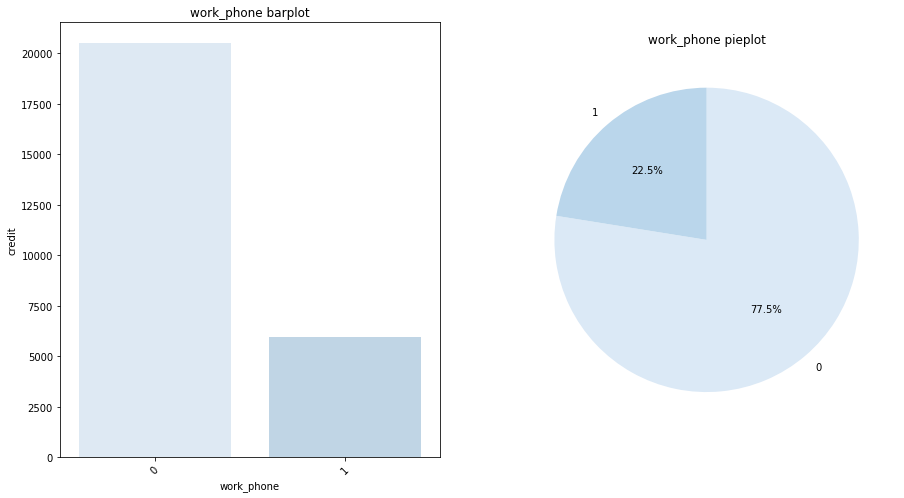

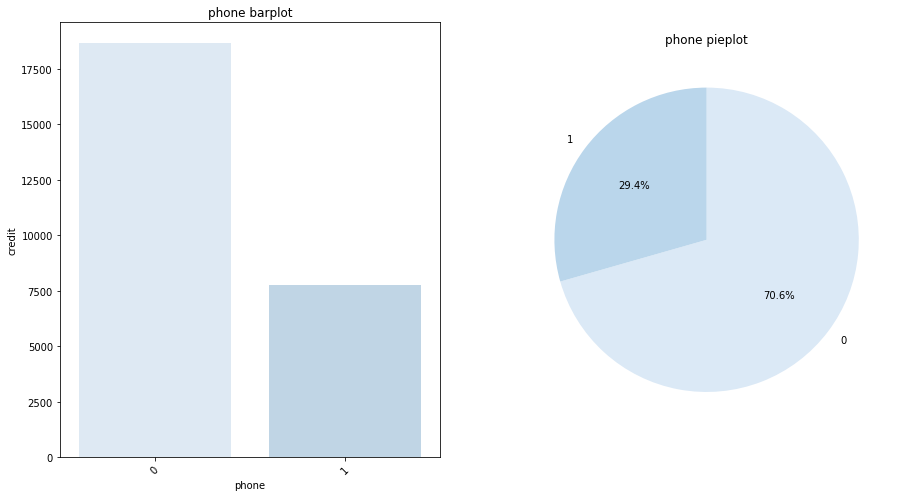

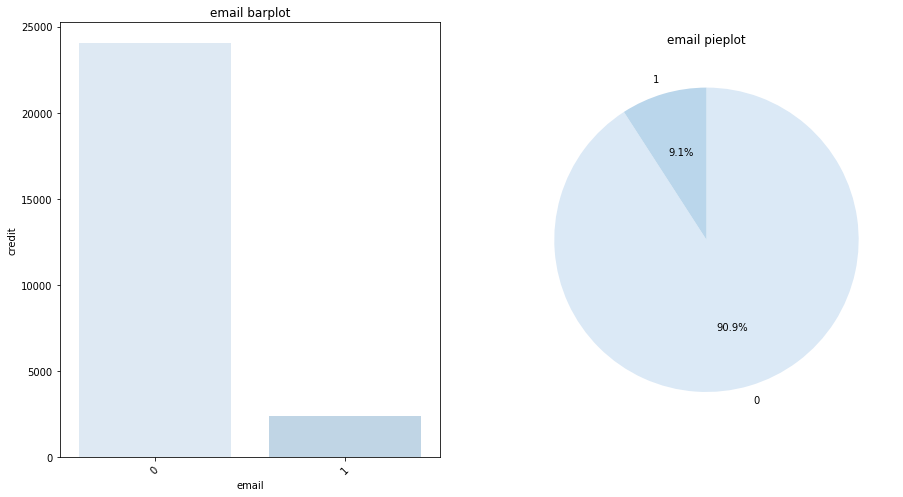

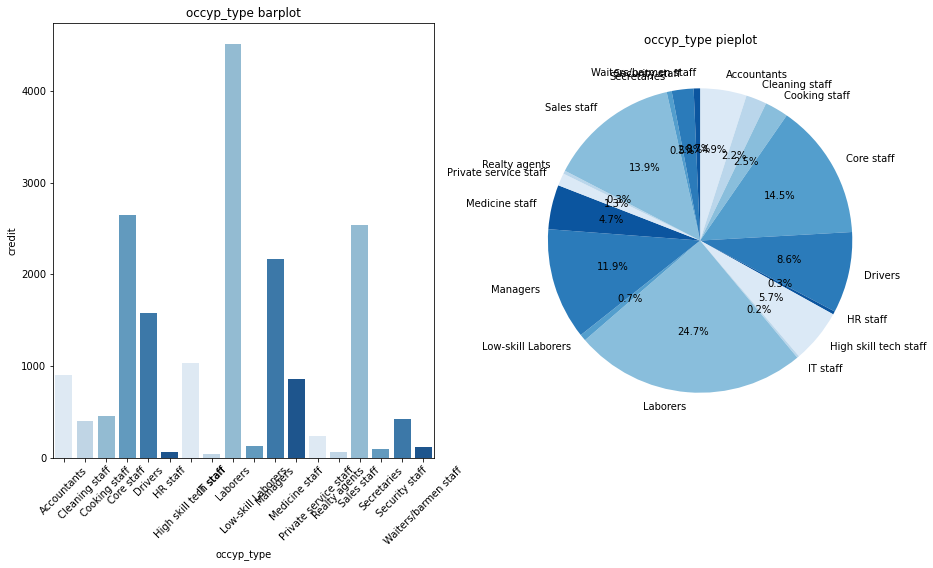

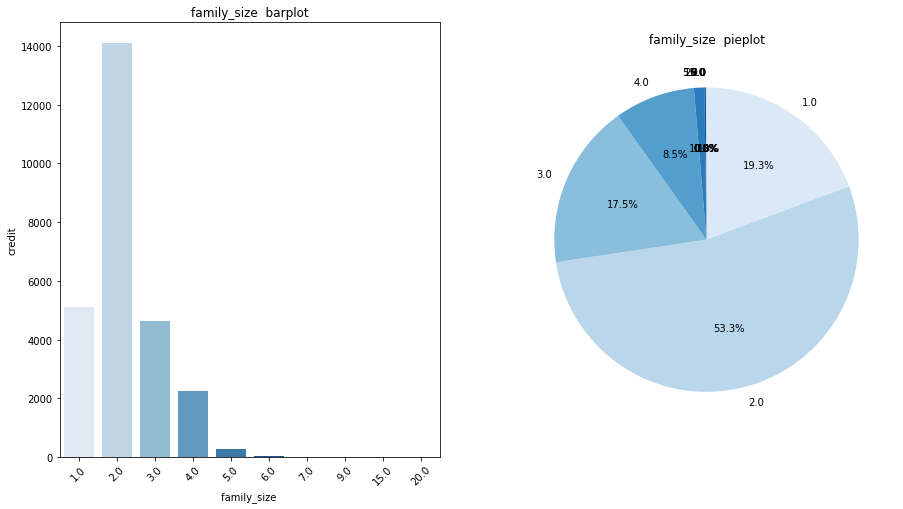

In [ ]:
str_EDA(train)

In [ ]:
def int_EDA(data):
  for i in data.columns:
    if data[i].dtypes != 'O':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.distplot(data,x=data[i],bins=20)
      plt.title('%s histogram'%i)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

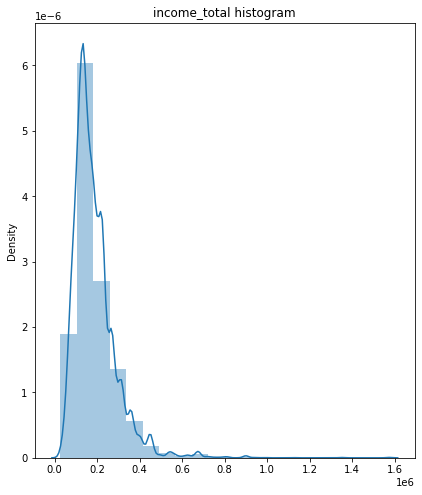

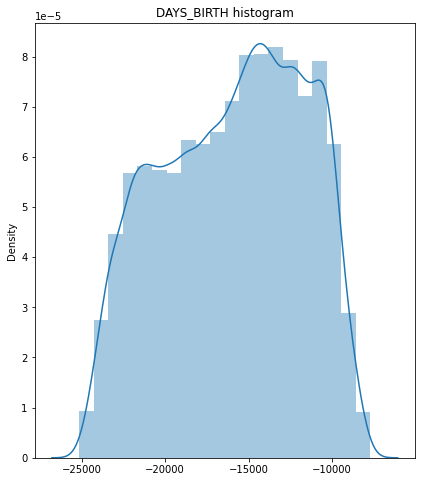

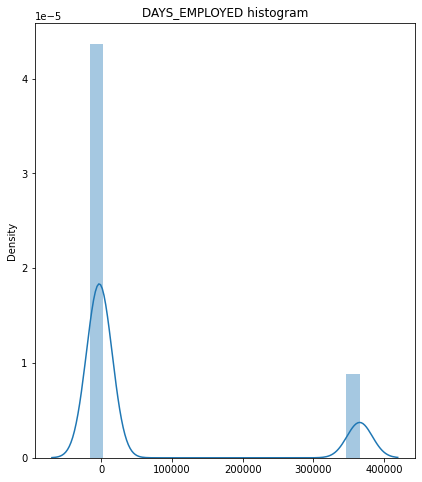

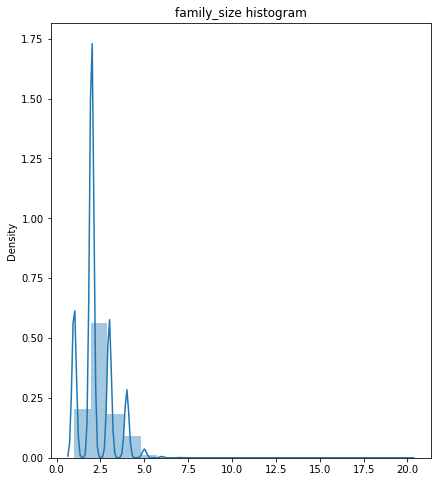

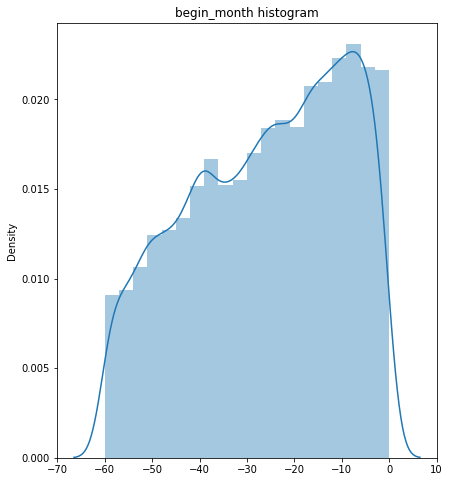

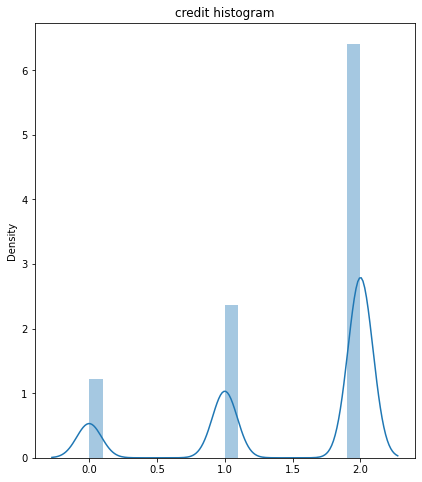

In [ ]:
int_EDA(train)

In [ ]:
#plt.subplot(1,3,1)
#sns.heatmap(cor_data.corr(),cmap='Blues', annot=True)
#plt.title('%s heatmap'%i)
#plt.xticks(rotation=45)

str_EDA
+ gender : F > M
	+ 유의미할지 모르겠다
+ car : N > Y
	+ 유의미할지 모르겠다
+ reality : Y > N
	+ 유의미 할수도?
+ chile_num : 0 > 1 > 2 > ...

+ income_type : Working > Commercial associate > ...
	+ 유의미 할수도?
+ house_type : apartment > ...
	+ 유의미하지 않을 듯
+ FLAG_MOBIL : 유의미 X
+ work_phone : 유의미 X
+ phone : 유의미 X
+ email : 유의미 X
+ occyp_type : 의미 있을 듯?

파생변수 생성
+ 자녀 외 가족 구성원의 수 파악 -> 의미가 있을 지는 모르겠다
	+ family_size == 2 : 14106
	+ child_num == 0 : 18340
+ 나이 변수 생성
	+ 연령대 파악 가능
	+ DAYS_BIRTH 이용
+ 업무 시작 기간 생성
	+ DAYS_EMPLOYED 이용
+ 신용카드 사용 기간
	+ begin_month 이용


-> 모든 변수의 유의성 검정 필요


### 카이제곱 검정

+ 카이제곱 검정의 가설 : 둘 이상의 집단 간에 특정 비율에서 차이가 있는 지 검정
+ 독립변수와 종속변수가 모두 범주형이기 때문에 시행

-> 사용자의 신용카드 대금 연체 정도를 예측 : credit이 낮을 수록 신용도가 낮다

+ 적합도 검정 : 어떤 모집단의 표본이 그 모집단을 대표하는지 검정
+ 동질성 검정 : 두 집단의 분포가 동일한지 검정
+ 독립성 검정 : 두 개 이상의 변수가 서로 독립인지 검정
  + 귀무가설 : 두 변수는 연관성이 없다 (독립)
  + 대립가설 : 두 변수는 연관성이 있다 (독립X)
  + https://bioinformaticsandme.tistory.com/139

  ---
  사용자의 신용도와 범주형 변수의 차이가 존재하는 지 검정
  + 데이터에 존재하는 범주형 변수는 데이터의 개수가 고르지 않아 변화 유무를 확인하기 위해 카이제곱검정을 실시

+ https://mabhik93.medium.com/difference-between-chi2-contingency-and-chisquare-in-python-132dacf84678
+ https://freedata.tistory.com/60
+ https://mindscale.kr/course/basic-stat-python/28/
+ https://kicarussays.tistory.com/21
+ https://www.andrewvillazon.com/logistic-regression-python-statsmodels/

In [ ]:
def list_sep (data):
  cat_list = []
  int_list = []
  for i in data.columns:
    if data[i].dtypes == 'O':
      cat_list.append(i)
    else :
      int_list.append(i)

  return int_list, cat_list

In [ ]:
int_list, cat_list = list_sep(train)
print('int : ',int_list)
print('cat : ',cat_list)

int :  ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit']
cat :  ['gender', 'car', 'reality', 'child_num', 'income_type', 'edu_type', 'family_type', 'house_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type', 'family_size ']


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#H0 : 독립변수의 범주형 변수(i)에 따른 종속변수 (credit)의 비율은 차이가 있다
#H1 : 차이가 없다

h0 = []
h1 = []
chi = pd.DataFrame()


for i in cat_list:
  chi_list = []
  cross_df = pd.crosstab(train[i],train['credit'],margins=False)
  result = chi2_contingency(observed=cross_df, correction=False)
  print(i)
  print('카이제곱 통계량 : ',result[0])
  print('p-value : ',result[1])
  print('df : ',result[2])
  print('----------------')

  if result[1] < 0.05:
    h1.append(i)
  else :
    h0.append(i)

  chi_list.append(result[0])
  chi_list.append(result[1])
  chi_list.append(result[2])

gender
카이제곱 통계량 :  0.7537432708436201
p-value :  0.6860041268748402
df :  2
----------------
car
카이제곱 통계량 :  9.396435899998448
p-value :  0.00911149979079031
df :  2
----------------
reality
카이제곱 통계량 :  11.231612023431143
p-value :  0.003639874733804707
df :  2
----------------
child_num
카이제곱 통계량 :  23.336949016023762
p-value :  0.10501967203104617
df :  16
----------------
income_type
카이제곱 통계량 :  23.67493919717791
p-value :  0.002597628613417879
df :  8
----------------
edu_type
카이제곱 통계량 :  8.971240706675461
p-value :  0.3447278706741385
df :  8
----------------
family_type
카이제곱 통계량 :  46.42033066995933
p-value :  1.9773036160067362e-07
df :  8
----------------
house_type
카이제곱 통계량 :  37.7634929047655
p-value :  4.1722572502802304e-05
df :  10
----------------
FLAG_MOBIL
카이제곱 통계량 :  0.0
p-value :  1.0
df :  0
----------------
work_phone
카이제곱 통계량 :  0.36370480743016514
p-value :  0.8337243859569919
df :  2
----------------
phone
카이제곱 통계량 :  8.035166508706913
p-value :  0.017996405160201

In [ ]:
print('h0 : ',h0)
print('h1 : ',h1)

h0 :  ['gender', 'child_num', 'edu_type', 'FLAG_MOBIL', 'work_phone']
h1 :  ['car', 'reality', 'income_type', 'family_type', 'house_type', 'phone', 'email', 'occyp_type', 'family_size ']


In [ ]:
#H0 : 독립변수의 범주형 변수(i)에 따른 종속변수 (credit)의 비율은 차이가 있다
#H1 : 차이가 없다

h0 = []
h1 = []
chi = []

for i in cat_list:
  chi_list = []
  cross_df = pd.crosstab(train[i],train['credit'],margins=False)
  result = chi2_contingency(observed=cross_df, correction=False)

  chi_list.append(result[0])
  chi_list.append(result[1])
  chi_list.append(result[2])
  chi.append(chi_list)

chi_df = pd.DataFrame(columns=['chi_2','p-value','df'],data = chi)
chi_df.index = cat_list


In [ ]:
chi_df

,chi_2,p-value,df
gender,0.753743,6.860041e-01,2
car,9.396436,9.111500e-03,2
reality,11.231612,3.639875e-03,2
child_num,23.336949,1.050197e-01,16
income_type,23.674939,2.597629e-03,8
edu_type,8.971241,3.447279e-01,8
family_type,46.420331,1.977304e-07,8
house_type,37.763493,4.172257e-05,10
FLAG_MOBIL,0.000000,1.000000e+00,0
work_phone,0.363705,8.337244e-01,2


In [ ]:
chi_df1 = chi_df[chi_df['p-value']<0.05]
chi_df1

,chi_2,p-value,df
car,9.396436,9.111500e-03,2
reality,11.231612,3.639875e-03,2
income_type,23.674939,2.597629e-03,8
family_type,46.420331,1.977304e-07,8
house_type,37.763493,4.172257e-05,10
phone,8.035167,1.799641e-02,2
email,6.065864,4.817418e-02,2
occyp_type,88.557143,9.450692e-07,34
family_size,42.574636,9.187130e-04,18


In [ ]:
chi_df2 = chi_df1[chi_df1['chi_2']>10]

,chi_2,p-value,df
reality,11.231612,3.639875e-03,2
income_type,23.674939,2.597629e-03,8
family_type,46.420331,1.977304e-07,8
house_type,37.763493,4.172257e-05,10
occyp_type,88.557143,9.450692e-07,34
family_size,42.574636,9.187130e-04,18


In [ ]:
print(len(train.columns),len(chi_df),len(chi_df1),len(chi_df2))

20 14 9 6
